### Random forest classifier fitted by out of bag estimate of error

 1. Load clean data into memory
 2. The 2 parameters are the number of trees in the RF and the number of variables choosen randomly at each node 
 3. Measure accuracy over test set and AUC

In [1]:
import numpy as np
import pandas as pd
import os

os.chdir('/Users/bwilliams/GoogleDrive/UniversityOfHelsinki/Fall2020/IML/TeamProject/TermProjectIML/bin')
from SplitData import *

from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


In [2]:
# Find optimal RF through OOB error estimate

RANDOM_STATE = 123
ensemble_clfs = [
    ("RF, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RF, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RF, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RF, max_features=20",
        RandomForestClassifier(warm_start=True, max_features=20,
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RF, max_features=5",
        RandomForestClassifier(warm_start=True, max_features=5,
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RF, max_features=15",
        RandomForestClassifier(warm_start=True, max_features=15,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]


/Users/bwilliams/anaconda3/envs/UniversityHelsinki/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/bwilliams/anaconda3/envs/UniversityHelsinki/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/bwilliams/anaconda3/envs/UniversityHelsinki/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/bwilliams/anaconda3/envs/UniversityHelsinki/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/bwilliams/ana

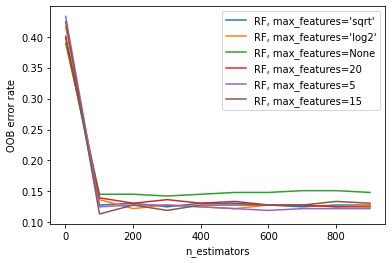

In [3]:
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.

for label, clf in ensemble_clfs:
    for i in range(1, 1000+ 1,100):
        clf.set_params(n_estimators=i)
        clf.fit(X_trainval, y_trainval_bin)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()


Accuracy on Train: 1.0
OOB Accuracy:  0.8691860465116279
Accuracy on Test: 0.8837209302325582


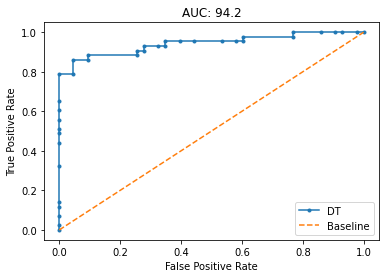

In [4]:
# Chosen model
clf = RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE,   n_estimators = 410)
clf.fit(X_trainval, y_trainval_bin)

y_pred_train = clf.predict(X_trainval)

print("Accuracy on Train:",metrics.accuracy_score(y_trainval_bin, y_pred_train))

print ('OOB Accuracy: ', clf.oob_score_) 


y_pred = y_pred_train = clf.predict(X_test)
# probabilities of class event
y_pred_proba = clf.predict_proba(X_test)[:,0]

print("Accuracy on Test:",metrics.accuracy_score(y_test_bin, y_pred))

y_test_01 = pd.get_dummies(y_test_bin)['event']

fpr, tpr, thresholds = metrics.roc_curve(y_test_01, y_pred_proba)
auc = metrics.auc(fpr, tpr)

plt.plot(fpr,tpr , marker='.', label='DT')
plt.title('AUC: '+ str(round(100*auc,1)) ) 
plt.plot(fpr, fpr, linestyle='--', label='Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

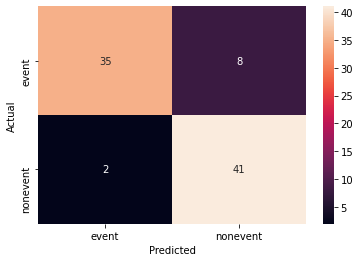

In [5]:
import seaborn as sns
confusion_matrix = pd.crosstab(y_test_bin, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [6]:
#######################################
# Multi class RF

# Find optimal RF through OOB error estimate

RANDOM_STATE = 123
ensemble_clfs = [
    ("RF, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RF, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RF, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RF, max_features=20",
        RandomForestClassifier(warm_start=True, max_features=20,
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RF, max_features=5",
        RandomForestClassifier(warm_start=True, max_features=5,
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RF, max_features=15",
        RandomForestClassifier(warm_start=True, max_features=15,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]


/Users/bwilliams/anaconda3/envs/UniversityHelsinki/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/bwilliams/anaconda3/envs/UniversityHelsinki/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/bwilliams/anaconda3/envs/UniversityHelsinki/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/bwilliams/anaconda3/envs/UniversityHelsinki/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/bwilliams/ana

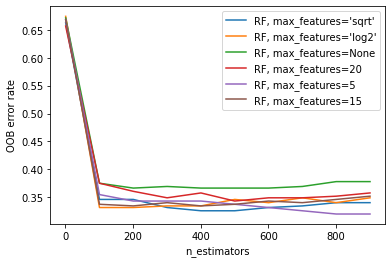

In [7]:
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.

for label, clf in ensemble_clfs:
    for i in range(1, 1000+ 1,100):
        clf.set_params(n_estimators=i)
        clf.fit(X_trainval, y_trainval)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()


Accuracy on Train: 1.0
OOB Accuracy:  0.6627906976744186
Accuracy on Test: 0.7209302325581395


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

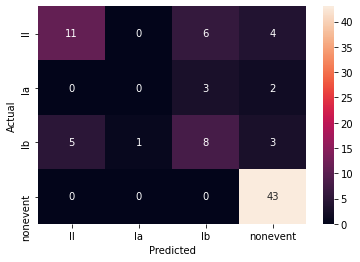

In [8]:
# Chosen model
clf = RandomForestClassifier(warm_start=True, max_features=15,
                               oob_score=True,
                               random_state=RANDOM_STATE,   n_estimators = 410)
clf.fit(X_trainval, y_trainval)

y_pred_train = clf.predict(X_trainval)

print("Accuracy on Train:",metrics.accuracy_score(y_trainval, y_pred_train))

print ('OOB Accuracy: ', clf.oob_score_) 


y_pred = y_pred_train = clf.predict(X_test)
# probabilities of class event
y_pred_proba = clf.predict_proba(X_test)[:,0]

print("Accuracy on Test:",metrics.accuracy_score(y_test, y_pred))


confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
